# BpR2 vs number of bins

This should show how bpR2 changes when changing the number of bins

In [61]:
from  __future__ import division
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import numpy as np
from matplotlib_venn import venn3, venn3_circles
import bokeh.plotting as bplt
import bokeh.models as bmod
import bokeh as bk
from scipy import stats
bk.io.output_notebook()
%matplotlib inline  

BokehJS successfully loaded.

In [10]:
folder_dict ={
    4:'nbin_experiment_4_2.5perc_bpr2_median_25_final',
    5:'nbin5_2.5perc_bpr2_median_25_test',
    8:'nbin_experiment_8_2.5perc_bpr2_median_25_final',
    10: 'nbin10_2.5perc_bpr2_median_25_final',
    12: 'nbin_experiment_12_2.5perc_bpr2_median_25_final',
    15:'nbin_experiment_15_2.5perc_bpr2_median_25_final',
    20: 'nbin20_2.5perc_bpr2_median_25_test',
    25: 'nbin_experiment_25_2.5perc_bpr2_median_25_final',
    30: 'nbin_experiment_30_2.5perc_bpr2_median_25_final',
    40: 'nbin40_2.5perc_bpr2_median_25_test',
    60: 'nbin_experiment_60_2.5perc_bpr2_median_25_final',
    80: 'nbin80_2.5perc_bpr2_median_25_test',
    100:  'nbin_experiment_100_2.5perc_bpr2_median_25_final'}
    
base_folder = '/mnt/imls-bod/Xiao-Kang/EGF transfection/plots/'

file_name = 't_bindat'  

        

In [11]:
tdat = pd.read_pickle(os.path.join(base_folder,folder_dict[5],file_name))

bp_dict = dict((key,pd.read_pickle(os.path.join(base_folder,fol,file_name))[('stats', 'mean_mean_var_ratio')]) 
               for key, fol in folder_dict.items())

bp_dat = pd.DataFrame.from_dict(bp_dict)
bp_dat = bp_dat.stack().reset_index(-1,drop=False)
bp_dat.columns = ['nbins', 'bpR2']
#bp_dat = bp_dat.reset_index(drop=False)

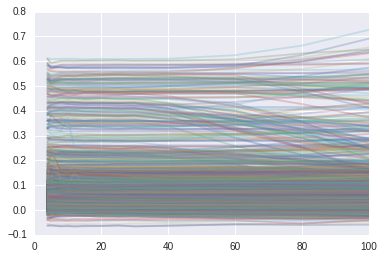

In [12]:
grouped = bp_dat.groupby(level=['experiment','marker','perturbation','row_col','timepoint','origin', 'target'])

for name, group in grouped:
    plt.plot(group['nbins'], group['bpR2'], alpha=0.1)

plt.show()

Try to divide it by tp=10 to show the deviations

In [39]:
bp_dat['bpR2_vs_10'] = np.array(bp_dat.groupby(level=['experiment','marker','perturbation','row_col','timepoint','origin', 'target']
                                   ).apply(lambda g: g['bpR2']/np.float(g['bpR2'][g['nbins'] == 10])))

bp_dat['bpR2_at_10'] = np.array(bp_dat.groupby(level=['experiment','marker','perturbation','row_col','timepoint','origin', 'target']
                                   ).apply(lambda g: g['bpR2']/g['bpR2']*np.float(g['bpR2'][g['nbins'] == 10])))
                                
bp_dat['bpR2_at_20'] = np.array(bp_dat.groupby(level=['experiment','marker','perturbation','row_col','timepoint','origin', 'target']
                                   ).apply(lambda g: g['bpR2']/g['bpR2']* np.float(g['bpR2'][g['nbins'] == 20])))

In [43]:
#bp_dat.hist(column='bpR2_vs_10',by='nbins')

bp_dat.groupby('nbins').describe()

bpR2    bpR2_at_10    bpR2_at_20    bpR2_vs_10
nbins                                                              
4     count  12600.000000  12588.000000  12588.000000  1.259400e+04
      mean       0.046021      0.051201      0.051186  8.468059e-01
      std        0.080215      0.078802      0.078474  6.509639e+00
      min       -0.063160     -0.066129     -0.064619 -2.697349e+02
      25%        0.011000      0.015723      0.015970  6.494459e-01
      50%        0.023566      0.030184      0.030548  8.069018e-01
      75%        0.043819      0.052377      0.052632  9.929626e-01
      max        0.611677      0.609955      0.609664  3.184617e+02
5     count  12600.000000  12591.000000  12591.000000  1.259400e+04
      mean       0.048470      0.051188      0.051173  9.597602e-01
      std        0.079606      0.078797      0.078469  3.992129e+00
      min       -0.062975     -0.066129     -0.064619 -1.052864e+02
      25%        0.012990      0.015718      0.015967  7.841970e-01
      50%        0.026577      0.030183      0.030544  8.901470e-01
      75%        0.047086      0.052366      0.052613  1.001897e+00
      max        0.608455      0.609955      0.609664  2.017234e+02
8     count  12600.000000  12594.000000  12594.000000  1.259400e+04
      mean       0.050836      0.051175      0.051161  9.192947e-01
      std        0.078956      0.078791      0.078464  3.826392e+00
      min       -0.066708     -0.066129     -0.064619 -2.185515e+02
      25%        0.015164      0.015715      0.015953  9.498498e-01
      50%        0.029463      0.030179      0.030543  9.853216e-01
      75%        0.051882      0.052366      0.052613  1.013035e+00
      max        0.609340      0.609955      0.609664  2.899526e+01
10    count  12600.000000  12594.000000  12594.000000  1.259400e+04
      mean       0.051151      0.051175      0.051161  1.000000e+00
      std        0.078780      0.078791      0.078464  0.000000e+00
      min       -0.066129     -0.066129     -0.064619  1.000000e+00
      25%        0.015709      0.015715      0.015953  1.000000e+00
      50%        0.030174      0.030179      0.030543  1.000000e+00
...                   ...           ...           ...           ...
40    std        0.078031      0.078780      0.078453           NaN
      min       -0.063730     -0.066129     -0.064619          -inf
      25%        0.016449      0.015709      0.015938  9.679659e-01
      50%        0.030497      0.030174      0.030538  1.022883e+00
      75%        0.051796      0.052352      0.052610  1.109994e+00
      max        0.609802      0.609955      0.609664  1.876581e+03
60    count  12600.000000  12600.000000  12600.000000  1.260000e+04
      mean       0.051169      0.051151      0.051137          -inf
      std        0.077164      0.078780      0.078453           NaN
      min       -0.057959     -0.066129     -0.064619          -inf
      25%        0.017128      0.015709      0.015938  9.696845e-01
      50%        0.031285      0.030174      0.030538  1.041100e+00
      75%        0.052392      0.052352      0.052610  1.168085e+00
      max        0.624334      0.609955      0.609664  1.910954e+03
80    count  12600.000000  12600.000000  12600.000000  1.260000e+04
      mean       0.051063      0.051151      0.051137           NaN
      std        0.076036      0.078780      0.078453           NaN
      min       -0.060866     -0.066129     -0.064619          -inf
      25%        0.017455      0.015709      0.015938  9.671084e-01
      50%        0.031449      0.030174      0.030538  1.061466e+00
      75%        0.052665      0.052352      0.052610  1.211208e+00
      max        0.662922      0.609955      0.609664           inf
100   count  12600.000000  12600.000000  12600.000000  1.260000e+04
      mean       0.050934      0.051151      0.051137          -inf
      std        0.075510      0.078780      0.078453           NaN
      min       -0.059372     -0.066129     -0.064619          -inf
      25%

Only look at bpR2 that are over 0.05 in at least one binning

In [67]:
thresh = 0.05
fil = np.array(bp_dat['bpR2'].groupby(level=['experiment','marker','perturbation','row_col','timepoint','origin', 'target']
                                   ).transform(lambda g: np.any(g > thresh)))

bp_dat_large = bp_dat.loc[fil == 1]

upper 99
nbins
4      1.264975
5      1.773765
8      1.279834
10     1.000000
12     1.174690
15     1.113075
20     1.137809
25     1.161844
30     1.191520
40     1.234179
60     1.311486
80     1.405770
100    1.508702
Name: bpR2_vs_10, dtype: float64
upper 95
nbins
4      1.143985
5      1.137654
8      1.055671
10     1.000000
12     1.058745
15     1.065889
20     1.087560
25     1.094458
30     1.113258
40     1.128658
60     1.180263
80     1.225177
100    1.301355
Name: bpR2_vs_10, dtype: float64

lower 05
nbins
4      0.587800
5      0.730311
8      0.932400
10     1.000000
12     0.965294
15     0.943252
20     0.914882
25     0.887733
30     0.838626
40     0.792593
60     0.756463
80     0.708572
100    0.626149
Name: bpR2_vs_10, dtype: float64

lower 01
nbins
4      0.474525
5      0.663603
8      0.895920
10     1.000000
12     0.826223
15     0.824062
20     0.759490
25     0.728157
30     0.687317
40     0.632313
60     0.565125
80     0.528715
100    0.466330
Name: b

AttributeError: Unknown property size

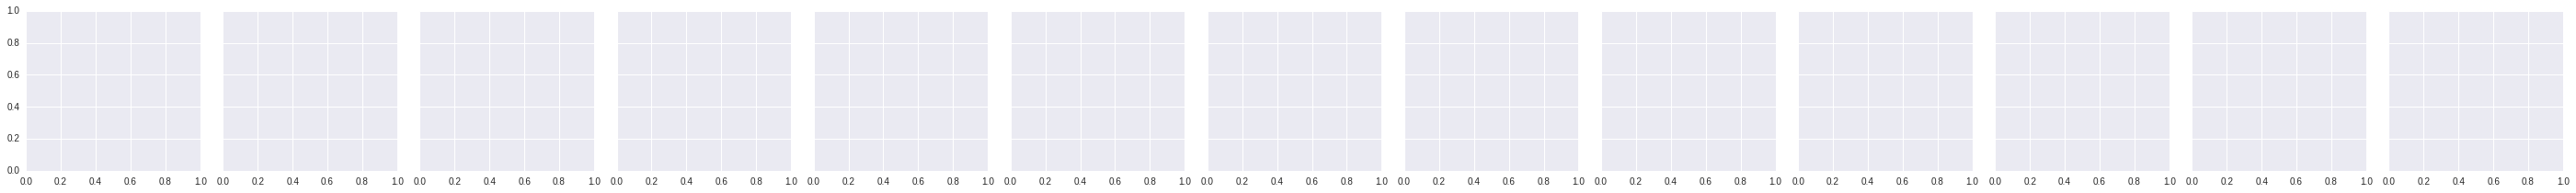

In [49]:
bp_dat_large.query('bpR2_vs_10 > 1.5')
print('upper 99')
print(bp_dat_large.groupby('nbins')['bpR2_vs_10'].apply(lambda x: np.percentile(x, 99)))
print('upper 95')
print(bp_dat_large.groupby('nbins')['bpR2_vs_10'].apply(lambda x: np.percentile(x, 95)))

print('\nlower 05')
print(bp_dat_large.groupby('nbins')['bpR2_vs_10'].apply(lambda x: np.percentile(x, 5)))
print('\nlower 01')
print(bp_dat_large.groupby('nbins')['bpR2_vs_10'].apply(lambda x: np.percentile(x, 1)))

g = sns.FacetGrid(bp_dat_large, col='nbins')
g.map(plt.scatter, 'bpR2_at_20' , 'bpR2', size=1)
#sns.plt.ylim(0,1)

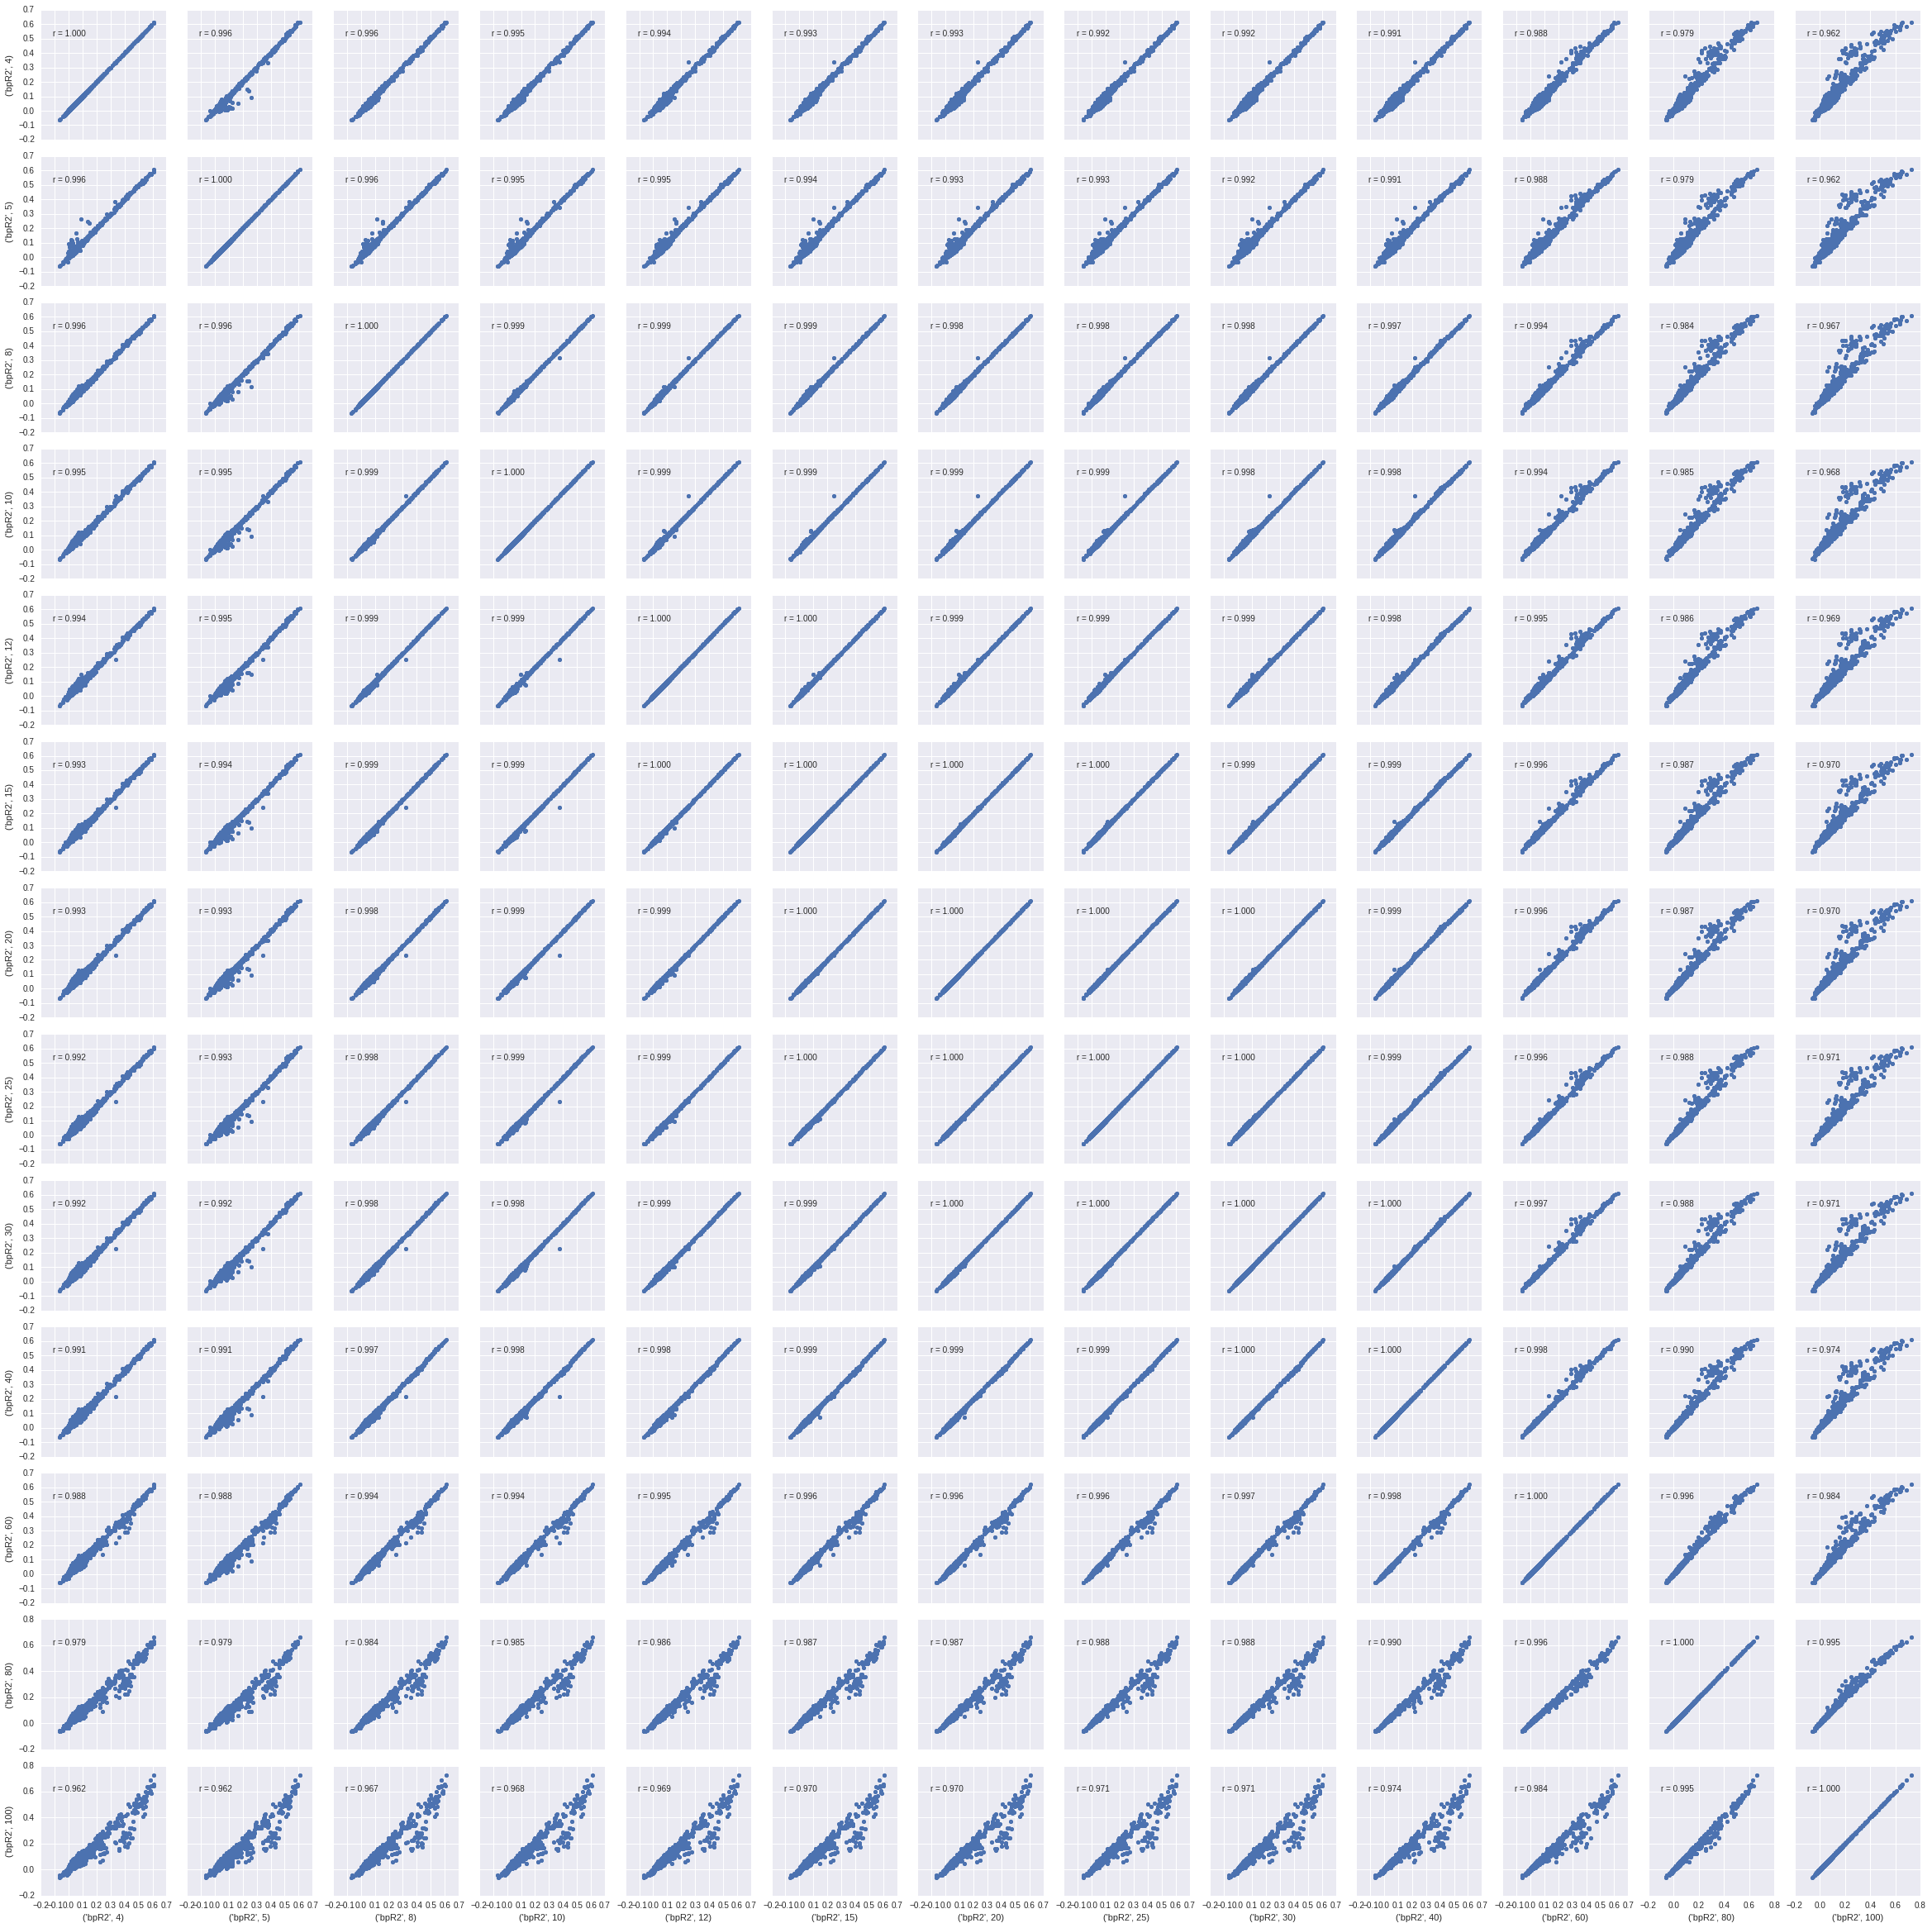

In [68]:
bp_mat = bp_dat[['nbins','bpR2']].pivot(columns='nbins')


def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.3f}".format(r),
                xy=(.1, .8), xycoords=ax.transAxes)

g = sns.PairGrid(bp_mat)
g.map(plt.scatter)
g.map(corrfunc)

In [131]:

folder_dict ={
            1:'mincell_experiment_10_2.5perc_bpr2_median_1_final',
        5:'mincell_experiment_10_2.5perc_bpr2_median_5_final',
    10:'mincell_experiment_10_2.5perc_bpr2_median_10_final',
        15:'mincell_experiment_10_2.5perc_bpr2_median_15_final',
        20:'mincell_experiment_10_2.5perc_bpr2_median_20_final',
    25:'mincell_experiment_10_2.5perc_bpr2_median_25_final',
        30:'mincell_experiment_10_2.5perc_bpr2_median_30_final',

        40:'mincell_experiment_10_2.5perc_bpr2_median_40_final',

        60:'mincell_experiment_10_2.5perc_bpr2_median_60_final',
    80:'mincell_experiment_10_2.5perc_bpr2_median_80_final',
    100:'mincell_experiment_10_2.5perc_bpr2_median_100_final',
        150:'mincell_experiment_10_2.5perc_bpr2_median_150_final'
}
    
base_folder = '/mnt/imls-bod/Xiao-Kang/EGF transfection/plots/'

file_name = 'bindat'  


#tdat = pd.read_pickle(os.path.join(base_folder,folder_dict[5],file_name))

bp_dict = dict((key,pd.read_pickle(os.path.join(base_folder,fol,file_name))[('stats', 'mean_mean_var_ratio')]) 
               for key, fol in folder_dict.items())

bp_dat = pd.DataFrame.from_dict(bp_dict)
bp_dat = bp_dat.stack().reset_index(-1,drop=False)
bp_dat.columns = ['mincells', 'bpR2']
#bp_dat = bp_dat.reset_index(drop=False)

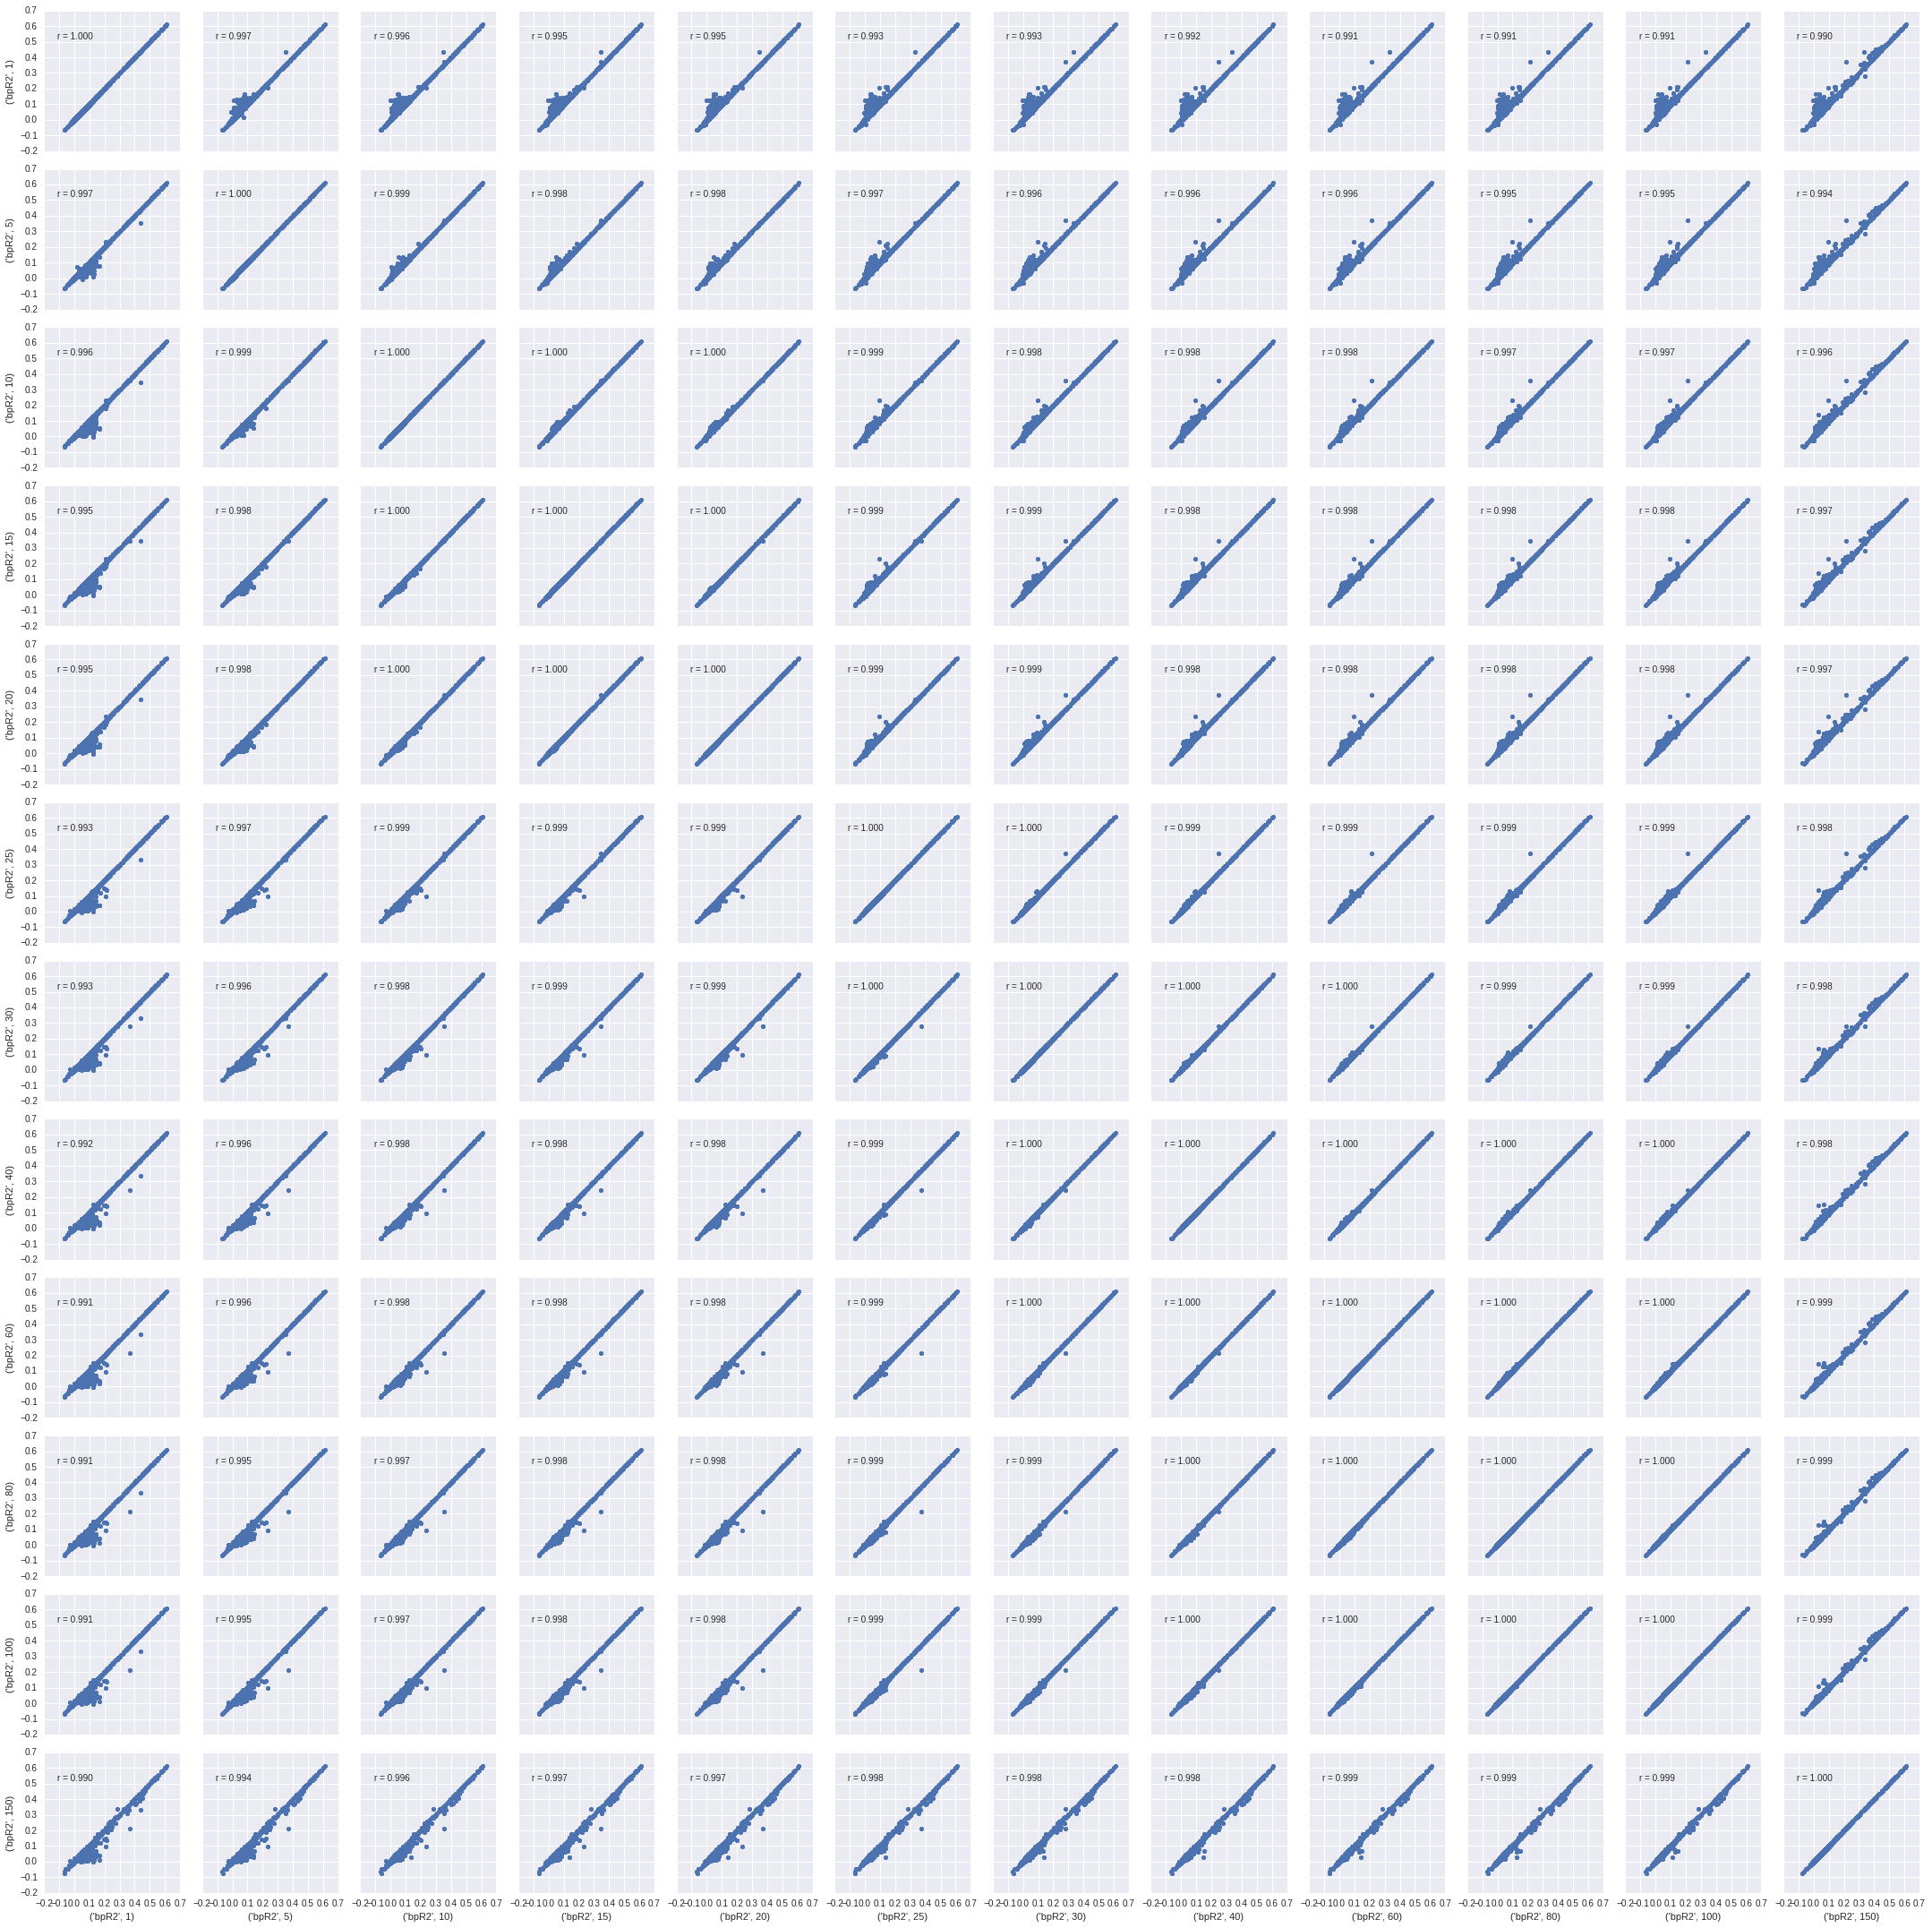

In [133]:
bp_mat = bp_dat[['mincells','bpR2']].pivot(columns='mincells')

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.3f}".format(r),
                xy=(.1, .8), xycoords=ax.transAxes)

g = sns.PairGrid(bp_mat, diag_sharey=False)
g.map(plt.scatter)
g.map(corrfunc)
#g.set(ylim=(0, 0.5))
#g.set(xlim=(0, 0.5))

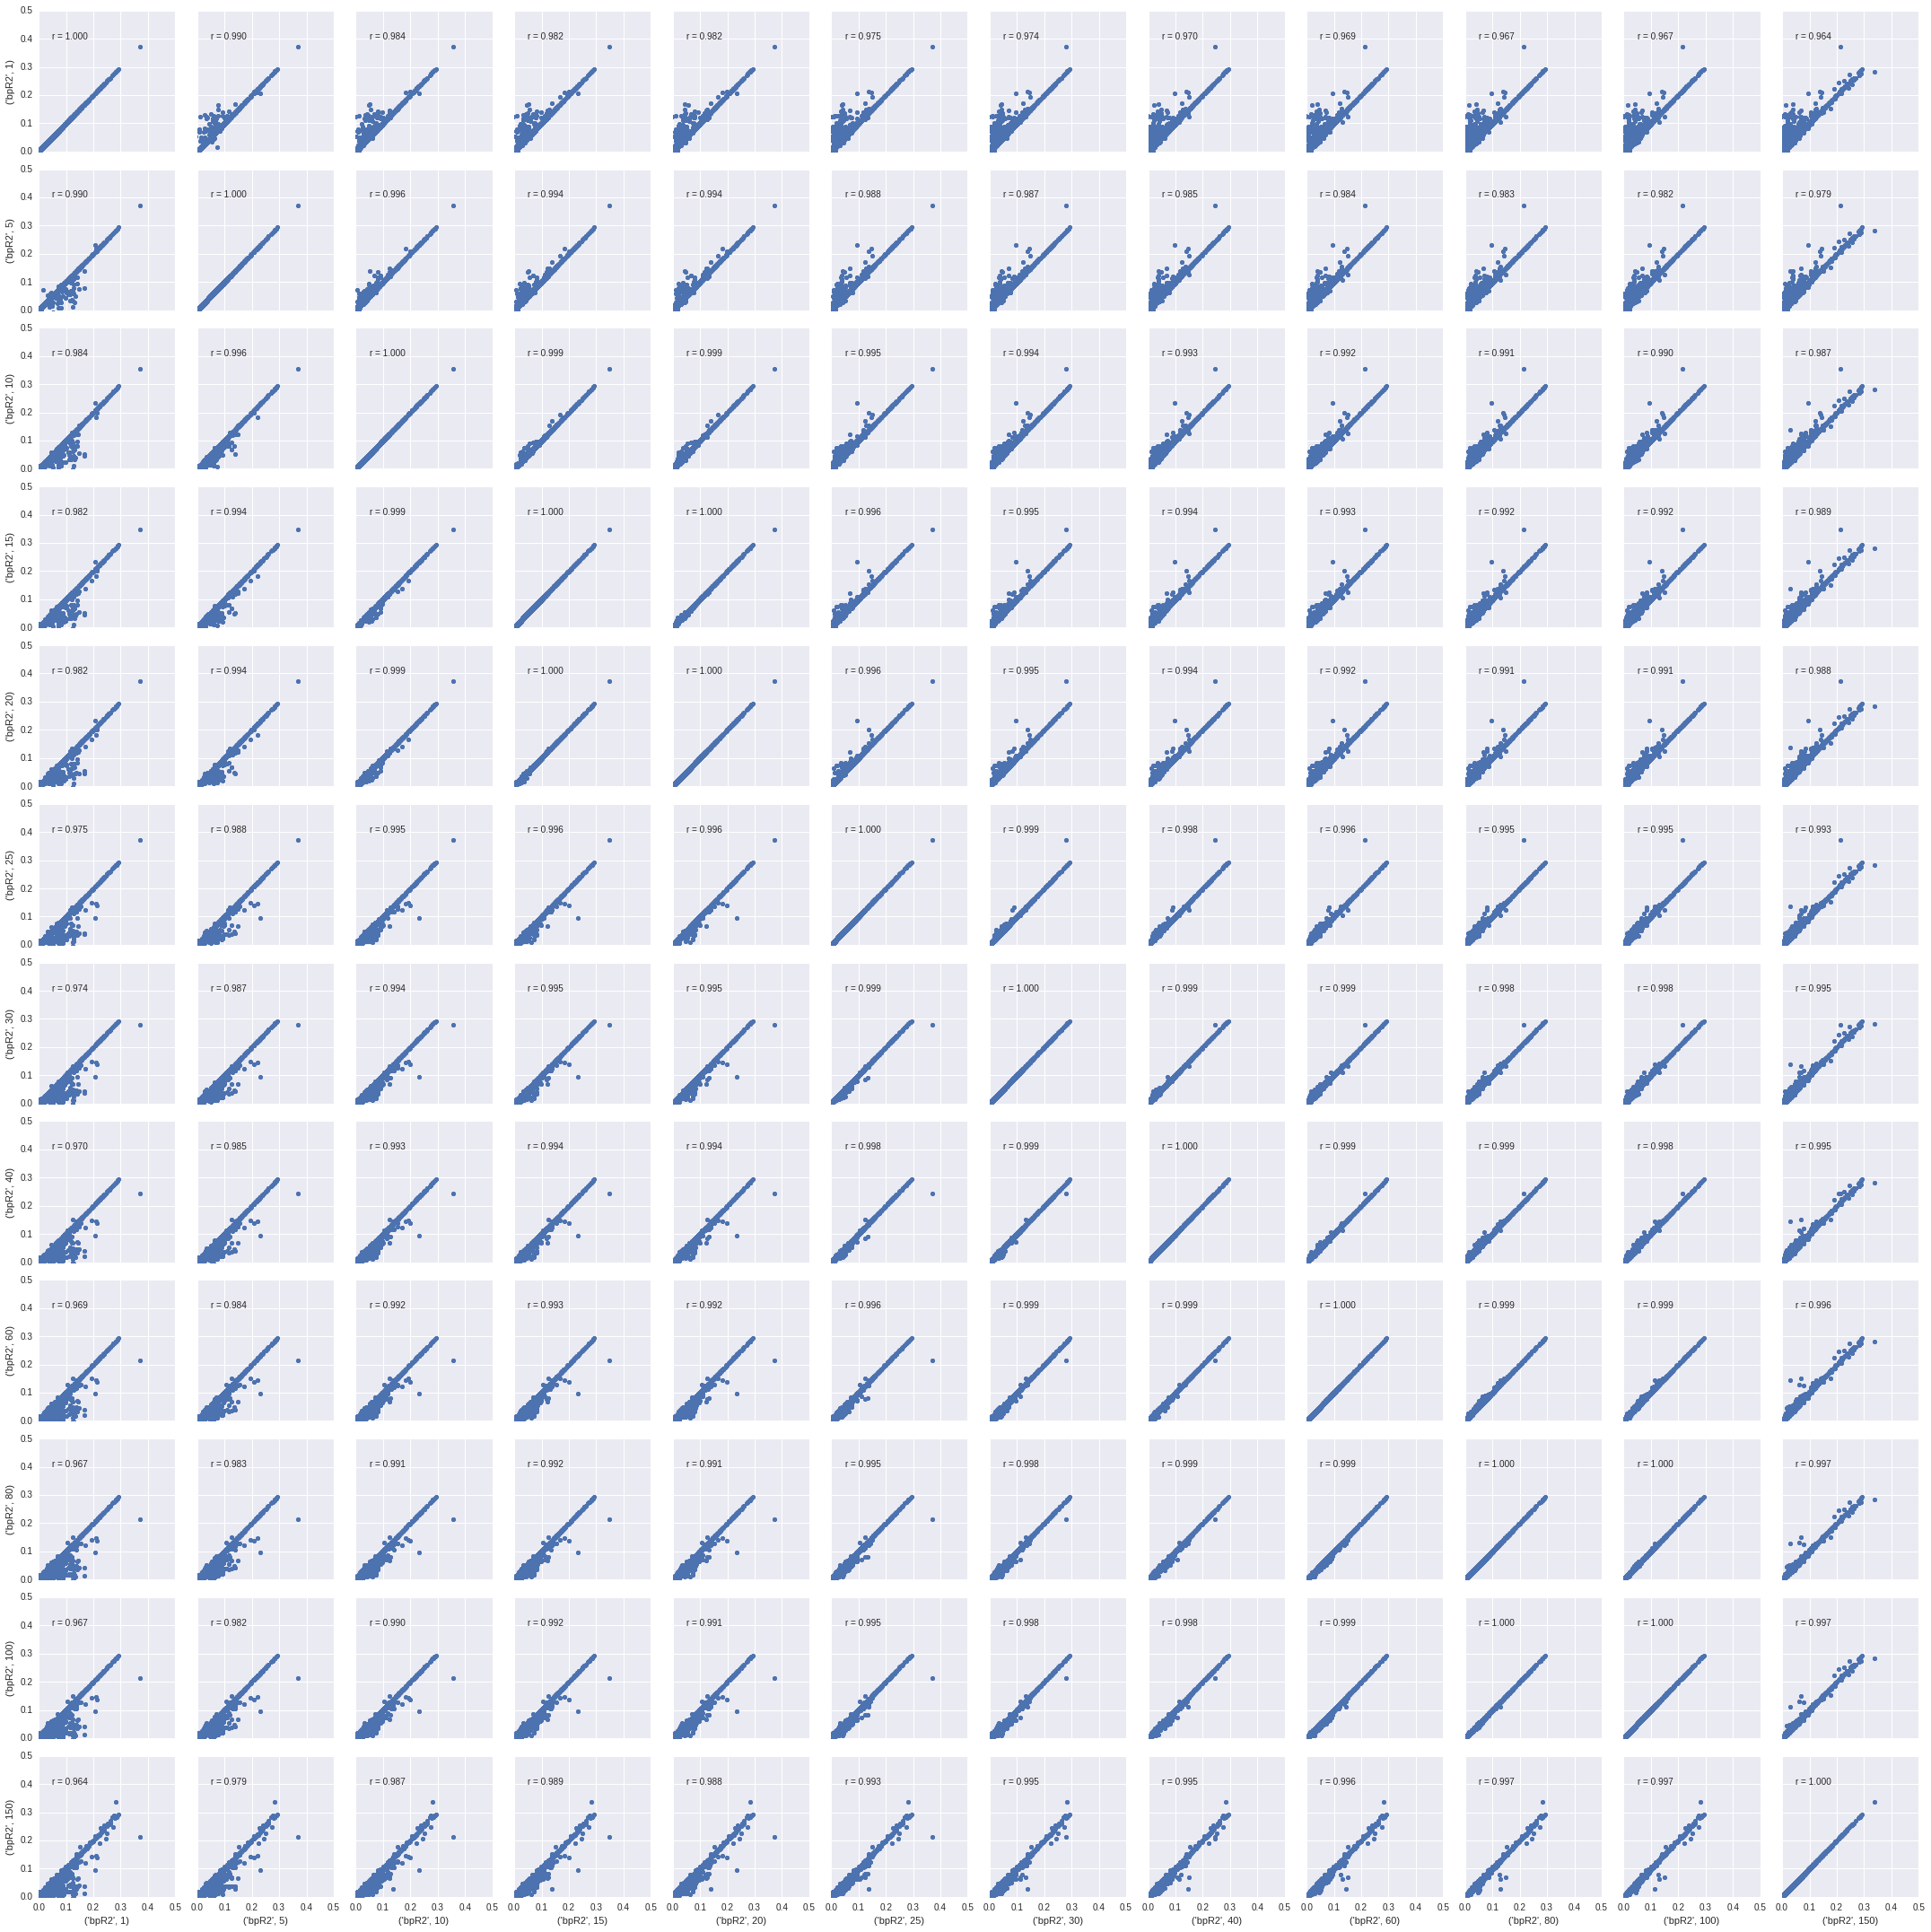

In [134]:
thresh = 0.3
fil = np.array(bp_dat['bpR2'].groupby(level=['experiment','marker','perturbation','row_col','timepoint','origin', 'target']
                                   ).transform(lambda g: np.any(g < thresh)))

bp_dat_large = bp_dat.loc[fil == 1]

bp_mat = bp_dat_large[['mincells','bpR2']].pivot(columns='mincells')

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.3f}".format(r),
                xy=(.1, .8), xycoords=ax.transAxes)

g = sns.PairGrid(bp_mat, diag_sharey=False)
g.map(plt.scatter)
g.map(corrfunc)
g.set(ylim=(0, 0.5))
g.set(xlim=(0, 0.5))

In [97]:
bp_dat.loc[np.isnan(bp_dat['bpR2'])]

,,,,,,,mincells,bpR2
experiment,marker,perturbation,row_col,timepoint,origin,target,,


In [98]:
np.all(np.isfinite(bp_dat['bpR2']))


True

In [99]:
bp_dat.xs('Beta-catenin', level='target').query('mincells >5')

KeyError: 'Beta-catenin'

In [88]:
bp_mat

bpR2  \
mincells                                                                                      5    
experiment marker  perturbation row_col timepoint origin target                                    
20150406   AKT1    EGF          D10     60        GFP    Beta-catenin                   0.081756   
                                                         CYCLINB1                            NaN   
                                                         E-cadherin                     0.049679   
                                                         ECAD                                NaN   
                                                         beads                         -0.000935   
                                                         cleaved PARP-cleaved caspase3  0.017817   
                                                         cleavedPARPandcleavedCASPASE3       NaN   
                                                         cyclin B1                      0.049985   
                                                         mTOR                                NaN   
                                                         nonpBCAT                            NaN   
                                                         p-4EBP1                        0.101064   
                                                         p-AKT                          0.240187   
                                                         p-AMPKalpha                    0.043310   
                                                         p-BTK                          0.089660   
                                                         p-CREB                         0.009359   
                                                         p-ERK1-2                       0.037439   
                                                         p-FAK                          0.033879   
                                                         p-GSK3-Beta                    0.104426   
                                                         p-HH3                          0.048004   
                                                         p-JNK                          0.056713   
                                                         p-MAPKAPK2                     0.034673   
                                                         p-MARCKS                       0.034091   
                                                         p-MEK1-2                       0.047745   
                                                         p-MKK3                         0.063585   
                                                         p-MKK3-6                       0.219789   
                                                         p-NfkB                         0.053170   
                                                         p-PDPK1                        0.081072   
                                                         p-PLCg2                        0.037286   
                                                         p-RB                           0.012595   
                                                         p-S6                           0.028074   
...                                                                                          ...   
20150605   empty-2 EGF          G9      30        GFP    p-p90RSK                       0.009707   
                                                         p4EBP1                              NaN   
                                                         pAKT                                NaN   
                                                         pAMPK                               NaN   
                                                         pBTK                                NaN   
                                                         pCREB                               NaN   
                                                         pERK                               